In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect("../db/baltasar.db")
def sql(query):
    return pd.read_sql_query(query, conn)

Most Entities only interact with one token:

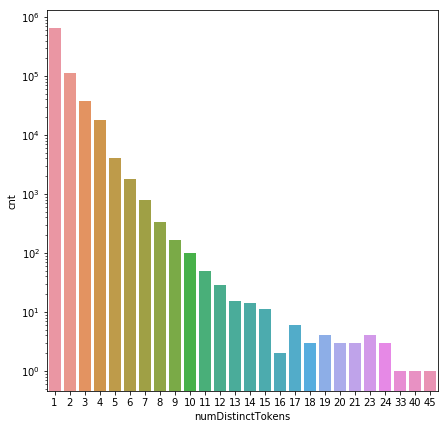

In [15]:
df = sql('''SELECT 
	numDistinctTokens, count(*) as cnt
FROM
	(SELECT 
		count(distinct token) as numDistinctTokens
	FROM 
		Entity e
		INNER JOIN
		ETransfer t
		ON e.name = t.`to`
	GROUP BY e.name)
GROUP BY numDistinctTokens''')
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.barplot(x='numDistinctTokens', y='cnt', data = df, ax=ax)

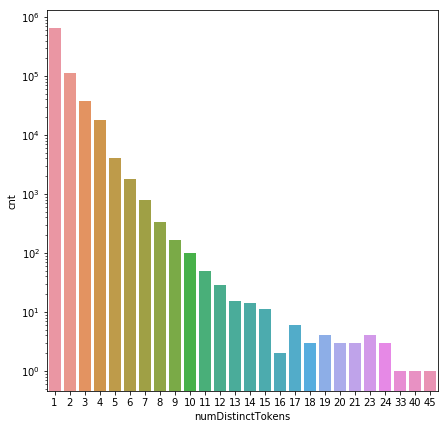

In [14]:
df = sql('''
SELECT 

FROM
    ETransfer in
    LEFT OUTER JOIN
    ETransfer out
    ON t.'to' = t.'from'
''')